In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
data=pd.read_csv('/content/Life Expectancy Data (1).csv')

In [40]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


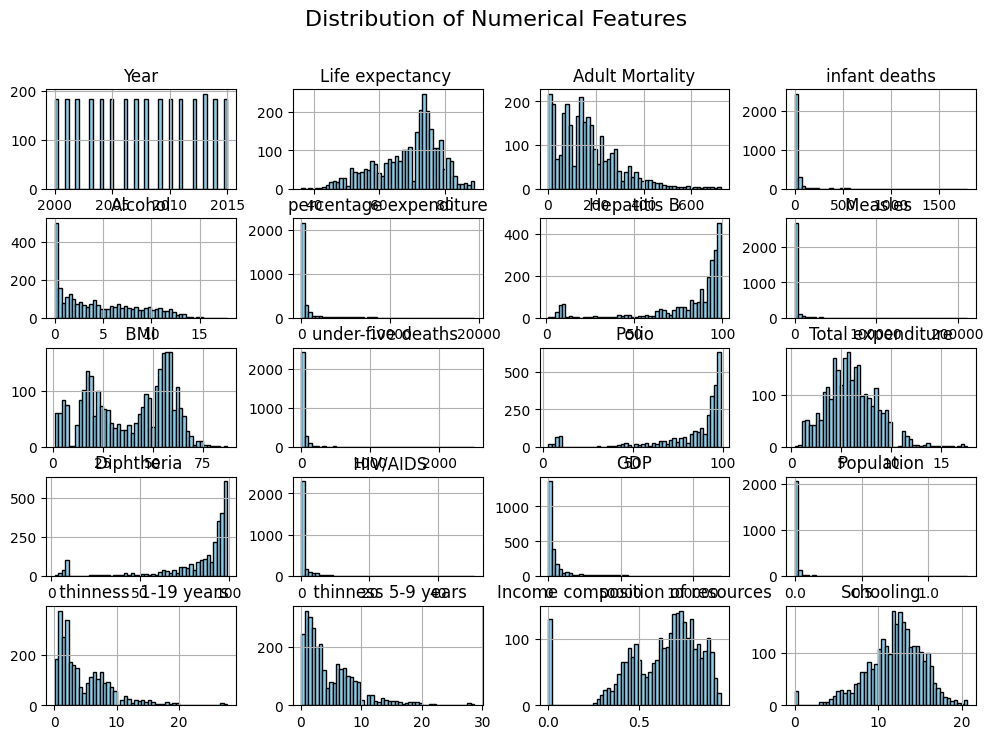

In [43]:
data.hist(bins=50, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

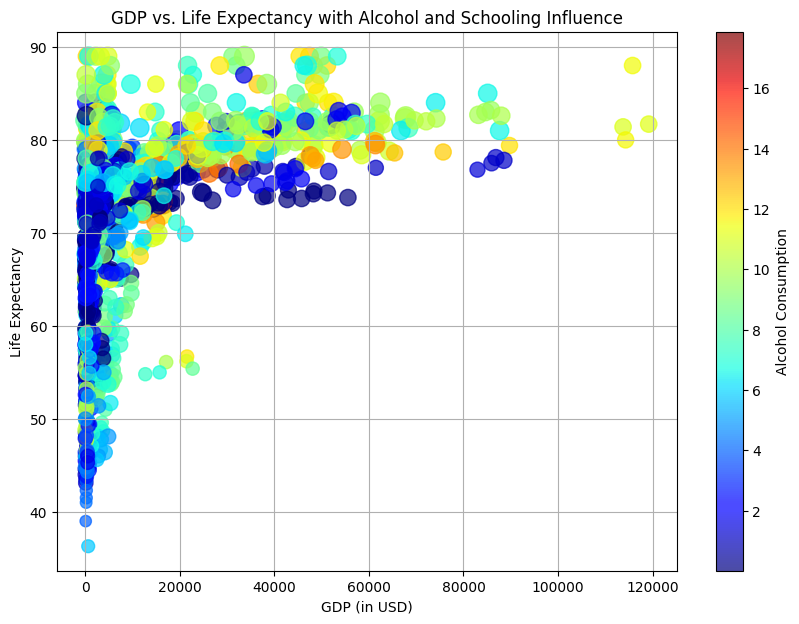

In [48]:
# Replace 'Life expectancy ' with the actual column name from your CSV
life_expectancy_col = 'Life expectancy '  # Adjust if needed

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=data["GDP"],
    y=data[life_expectancy_col],  # Use the corrected column name
    c=data["Alcohol"],
    cmap="jet",
    s=data["Schooling"] * 10,
    alpha=0.7
)

plt.colorbar(scatter, label="Alcohol Consumption")
plt.title("GDP vs. Life Expectancy with Alcohol and Schooling Influence")
plt.xlabel("GDP (in USD)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

In [49]:
data.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [50]:
data.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [53]:
# Replace 'Life expectancy ' with the actual column name from your CSV
life_expectancy_col = 'Life expectancy '  # Adjust if needed
#... existing code

X = data[["GDP", "Alcohol", "Schooling"]]  # Independent variables
y = data[life_expectancy_col]  # Dependent variable # Replace with actual name or `life_expectancy_col`

In [57]:
# prompt: FILL MISSING VALUE WITH MEDIAN

# Fill missing values in numerical columns with the median
numerical_cols = ["GDP", "Alcohol", "Schooling", life_expectancy_col]  # Add other numerical columns as needed
for col in numerical_cols:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].median())
    else:
        print(f"Column '{col}' is not numeric. Skipping median imputation.")

#Check for any remaining missing values after imputation
print(data.isna().sum())

# ... rest of your code
X = data[["GDP", "Alcohol", "Schooling"]]  # Independent variables
y = data[life_expectancy_col]  # Dependent variable

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                            0
dtype: int64


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [62]:
r2_score( y_test, y_pred)

0.562915032549422

In [63]:
print(lr.intercept_)

45.896991993859906


In [64]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.78881058])

In [65]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [66]:
import pickle

In [67]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [68]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [69]:
X[0:5]

,GDP,Alcohol,Schooling
0,584.259210,0.01,10.1
1,612.696514,0.01,10.0
2,631.744976,0.01,9.9
3,669.959000,0.01,9.8
4,63.537231,0.01,9.5


In [70]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.78881058, 64.60534421, 64.4208968 , 64.238452  , 63.6157739 ])

In [71]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
2546    73.7  67.388808
650     75.9  73.655020
1740    74.2  72.151065
177     76.8  75.628009
1377    51.9  61.646070


MULTIPLE LINEAR REGRESSION

In [74]:
X = data.drop(columns=["Life expectancy "])  # Independent variables, Add a space to the column name
y = data["Life expectancy "]

In [75]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2938, 21)
Shape of y: (2938,)


In [76]:
X = X.values
y = y.values

In [77]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (2350, 3)
Shape of y: (2350,)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(model_multiple.intercept_)

54343.29984897948


In [85]:
# Assuming 'Country' is the column with 'Afghanistan' and other country names
X = data.drop(columns=["Life expectancy ", "Country"])  # Independent variables, Add a space to the column name
y = data["Life expectancy "]

# ... (rest of your code for data preparation and splitting) ...

# Keep X as a DataFrame for select_dtypes to work:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Before prediction, convert categorical features to numerical using one-hot encoding:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with LinearRegression

# Fit the encoder to the categorical features in your training data
# Replace 'categorical_features_indices' with the indices or names of your categorical columns in X_train
# Now using X_train as a DataFrame:
categorical_features_indices = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object']).columns]
encoder.fit(X_train.iloc[:, categorical_features_indices])  # Use iloc for DataFrame indexing

# Transform both training and testing data using iloc for DataFrames
X_train_encoded = encoder.transform(X_train.iloc[:, categorical_features_indices])
X_test_encoded = encoder.transform(X_test.iloc[:, categorical_features_indices])

# Get numerical feature indices
numerical_features_indices = [i for i in range(X_train.shape[1]) if i not in categorical_features_indices]

# Combine encoded features with numerical features using NumPy arrays
X_train = np.concatenate([X_train.iloc[:, numerical_features_indices].values, X_train_encoded], axis=1)
X_test = np.concatenate([X_test.iloc[:, numerical_features_indices].values, X_test_encoded], axis=1)


# Now you can fit and predict

In [89]:
print(model_multiple.intercept_)

54343.29984897948


In [92]:
# Assuming 'Country' is the column with 'Afghanistan' and other country names
X = data.drop(columns=["Life expectancy ", "Country"])  # Independent variables, Add a space to the column name
y = data["Life expectancy "]

# ... (rest of your code for data preparation and splitting) ...

# Keep X as a DataFrame for select_dtypes to work:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in numerical features before one-hot encoding using SimpleImputer
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy 'median' (or 'mean' if you prefer)
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the numerical features in your training data
numerical_features_indices = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=np.number).columns]
imputer.fit(X_train.iloc[:, numerical_features_indices])

# Transform (impute) both training and testing data using iloc for DataFrames
X_train.iloc[:, numerical_features_indices] = imputer.transform(X_train.iloc[:, numerical_features_indices])
X_test.iloc[:, numerical_features_indices] = imputer.transform(X_test.iloc[:, numerical_features_indices])

# Before prediction, convert categorical features to numerical using one-hot encoding:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with LinearRegression

# Fit the encoder to the categorical features in your training data
# Now using X_train as a DataFrame:
categorical_features_indices = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object']).columns]
encoder.fit(X_train.iloc[:, categorical_features_indices])  # Use iloc for DataFrame indexing

# Transform both training and testing data using iloc for DataFrames
X_train_encoded = encoder.transform(X_train.iloc[:, categorical_features_indices])
X_test_encoded = encoder.transform(X_test.iloc[:, categorical_features_indices])


# Combine encoded features with numerical features using NumPy arrays
X_train = np.concatenate([X_train.iloc[:, numerical_features_indices].values, X_train_encoded], axis=1)
X_test = np.concatenate([X_test.iloc[:, numerical_features_indices].values, X_test_encoded], axis=1)

# Now you can fit and predict

In [93]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [101]:
[{"name":"model_multiple","value":"LinearRegression()","type":"LinearRegression"}]

[{'name': 'model_multiple',
  'value': 'LinearRegression()',
  'type': 'LinearRegression'}]

In [102]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

ValueError: array length 10 does not match index length 588